# Programming and Critical analysis

Ridge Regression
MAE: 0.16283


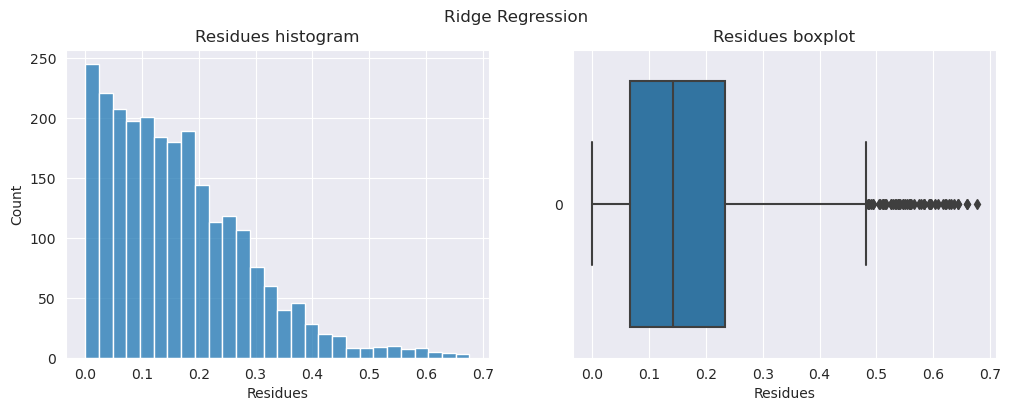

MLP 1
MAE: 0.06804
Iterations: 452


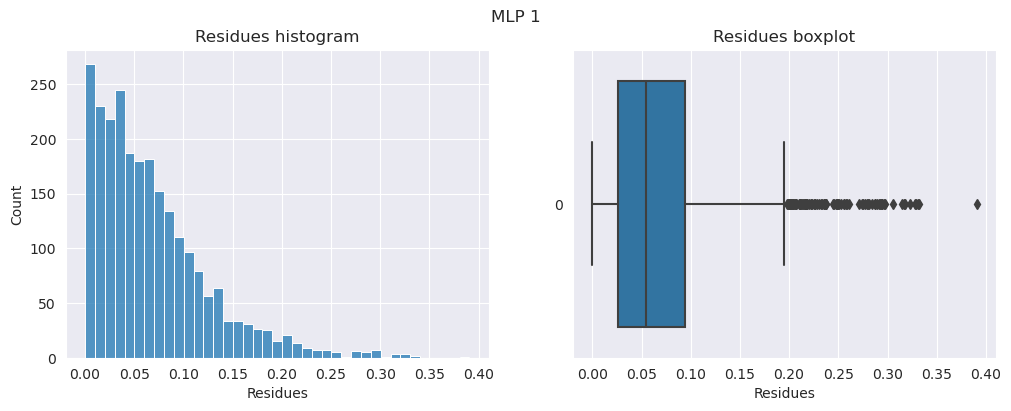

MLP 2
MAE: 0.09781
Iterations: 77


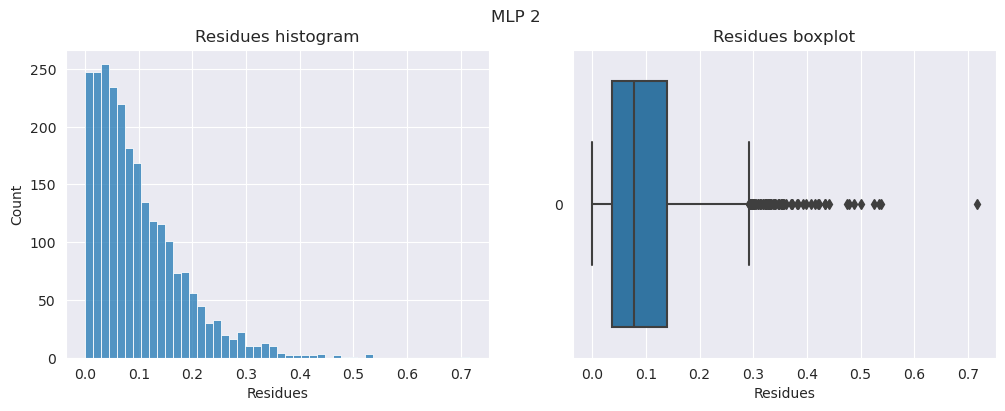

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
sns.set_style('darkgrid')

# Load data
data = loadarff('data/kin8nm.arff')
df = pd.DataFrame(data[0])

X = df.drop('y', axis=1).values
y = df['y'].values

X_train, X_test, y_train, y_test = train_test_split(
  X, y,
  test_size=0.3,
  random_state=0
)

def predict(regressor):
  regressor.fit(X_train, y_train)
  return regressor.predict(X_test)

def plot_regressor_residues(regressor, description, y_pred):
  """Utilized for answering question 2."""
  residues = np.abs(y_test - y_pred)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
  sns.histplot(data=residues, ax=ax1)
  ax1.set_title('Residues histogram')
  ax1.set_xlabel('Residues')
  sns.boxplot(data=residues, ax=ax2, orient='h')
  ax2.set_title('Residues boxplot')
  ax2.set_xlabel('Residues')
  plt.suptitle(description)
  plt.show()

def print_regressor(regressor, description, y_pred):
  """Utilized for answering questions 1. and 3."""
  print(description)
  print('MAE: {:.5f}'.format(mean_absolute_error(y_test, y_pred)))
  if "MLP" in description:
    print('Iterations: {}'.format(regressor.n_iter_))

regressors = {
  "Ridge Regression": Ridge(alpha=0.1),
  "MLP 1": MLPRegressor(
    hidden_layer_sizes=(10, 10),
    activation='tanh',
    max_iter=500,
    random_state=0,
    early_stopping=True
  ),
  "MLP 2": MLPRegressor(
    hidden_layer_sizes=(10, 10),
    activation='tanh',
    max_iter=500,
    random_state=0
  )
}

for description, regressor in regressors.items():
  y_pred = predict(regressor)
  print_regressor(regressor, description, y_pred)
  plot_regressor_residues(regressor, description, y_pred)

----

In [1]:
# Consider the problem of learning a regression model from 5 univariate observations
# ((0.8), (1), (1.2), (1.4), (1.6)) with targets (24,20,10,13,12).

# 𝑧̂ (𝑥, 𝐰) = ∑ 𝑤𝑗 𝜙𝑗 (𝑥) = 𝑤0 + 𝑤1 𝑥 + 𝑤2 𝑥^2 + 𝑤3 𝑥^3.

# Learn the Ridge regression (𝑙2 regularization) on the transformed data space using the closed
#form solution with 𝜆 = 2.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

X = np.array([[0.8], [1], [1.2], [1.4], [1.6]])
y = np.array([24, 20, 10, 13, 12])

def transform(X):
  return np.hstack([X**i for i in range(4)])

X_transformed = transform(X)

regressor = Ridge(alpha=2)
regressor.fit(X_transformed, y)

print('Weights: {}'.format(regressor.coef_))

Weights: [ 0.         -0.76265622 -1.36589303 -1.7158706 ]
